<center><font size=8>Hands-on - Decision Trees</font></center>

#Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution

# **Problem Statement**

### **Business Context**

Credit scoring is an important part of the financial industry, particularly as a measure of assessing the risk associated with issuing credit cards. By analyzing the data submitted by applicants, banks can estimate the chances of future defaults on credit card payments. Based on their analysis of the financial and personal attributes of the applicants, banks make informed decisions on whether to issue a credit card to an applicant. This allows for effective risk management.

Traditionally, banks undertook the task of determining creditworthiness manually via a structured process. This would include reviewing the applicant's credit report to assess their credit history, evaluating employment status and income statistics to assess their ability to repay, and also considering other factors such as length of credit history and types and number of credit accounts. This manual process would be time-consuming, even considering the initial screening part only.

### **Objectives**

A renowned bank has been facing a challenge: the percentage of credit card customers who defaulted payments has increased from 5% to 9%. This required them to thoroughly review the existing application screening process. Based on the results of the same, they believe that one of the reasons for the increase in defaulters is a lapse in process adherence. This might have been due to a rise in the volume of credit card applications, which is up by 35% in the past three months.

To accurately assess the risk involved and approve credit to financially reliable applicants, the bank wants to introduce a machine learning-based solution. As a part of the Data Science team of the bank, you have been tasked with analyzing the data of past applicants, identifying patterns in it, building an ML model to accurately determine the applicants' credibility, and identifying the attributes that drive eligibility for availing credit cards. The end goal is to use this ML-based solution to streamline the initial screening process to efficiently and accurately assess the creditworthiness of applications.

### **Data Dictionary**

1. **Gender:** The gender of the applicant

2. **Age:** The age of the applicant

3. **PriorDefault:** An indicator of the prior default history of the applicant

    - 0 represents no prior defaults
    - 1 represents at least one prior default

4. **CreditScore:** The current credit score of the applicant

5. **Annual Income:** The annual income of the applicant (in thousand dollars) based on their last drawn salary

6. **Employed:** An indicator of whether the applicant is currently employed

    - 1 represents currently employed
    - 0 represents currently not employed

7. **Approval:** Whether the credit card application was approved (Yes/No)

# **Installing and Importing the necessary libraries**

In [ ]:
!pip install pandas==2.2.2 numpy==2.0.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 -q

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

# **Loading the data**

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# loading data into a pandas dataframe
credit_approval = pd.read_csv("credit_card_approval.csv")

In [ ]:
# creating a copy of the data
data = credit_approval.copy()

# **Data Overview**

### Viewing the first and last 5 rows of the dataset

In [ ]:
data.head(5)

,Age,Credit Score,Annual Income,PriorDefault,Employed,Approval,Gender
0,33.541537,678.0,53.984881,0,1,No,Male
1,24.808335,624.0,41.131160,1,0,No,Male
2,23.342078,671.0,33.012298,1,1,No,Female
3,29.987970,671.0,66.942232,1,1,No,Female
4,29.707443,630.0,116.613468,1,1,No,Male


In [ ]:
data.tail(5)

,Age,Credit Score,Annual Income,PriorDefault,Employed,Approval,Gender
2495,41.401327,768.0,65.869626,0,0,No,Male
2496,31.341132,733.0,56.156239,0,1,Yes,Male
2497,43.622086,724.0,105.815964,0,0,No,Male
2498,44.091122,741.0,121.522753,0,1,Yes,Female
2499,23.775377,446.0,54.638692,1,1,No,Female


### Checking the shape of the dataset.

In [ ]:
data.shape

(2500, 7)

- The dataset has 2500 rows and 7 columns.

### Checking the attribute types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            2500 non-null   float64
 1   Credit Score   2500 non-null   float64
 2   Annual Income  2500 non-null   float64
 3   PriorDefault   2500 non-null   int64  
 4   Employed       2500 non-null   int64  
 5   Approval       2500 non-null   object 
 6   Gender         2500 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 136.8+ KB


- There are 3 numerical and 4 categorical variables in the data.
- Employed and PrioriDefault, although interpreted here as numerical, are categorical variables that are encoded by default.

### Checking the statistical summary

In [ ]:
data.describe(include="all")

,Age,Credit Score,Annual Income,PriorDefault,Employed,Approval,Gender
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500,2500
unique,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,Yes,Female
freq,NaN,NaN,NaN,NaN,NaN,1401,1251
mean,37.014342,703.019600,76.421887,0.300000,0.702000,NaN,NaN
std,9.814617,60.102094,32.942672,0.458349,0.457471,NaN,NaN
min,16.400000,342.000000,4.870000,0.000000,0.000000,NaN,NaN
25%,29.788468,666.000000,51.732313,0.000000,0.000000,NaN,NaN
50%,35.487664,713.000000,71.695510,0.000000,1.000000,NaN,NaN
75%,42.573775,747.000000,97.244651,1.000000,1.000000,NaN,NaN


- ~60% of the applications were approved.
- The average age of applicants is ~37 years.
- On average, applicants have a credit score of ~703.
- Applicants earn ~75k dollars annually, with ~25% earning more than $100k annually.
- At least 25% of the applicants have a prior default history.

### Checking for missing values

In [ ]:
# checking for null values
data.isnull().sum()

,0
Age,0
Credit Score,0
Annual Income,0
PriorDefault,0
Employed,0
Approval,0
Gender,0


- There are no missing values in the dataset.

### Checking for duplicate values

In [ ]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

* There are no duplicate values in the data.

# **Exploratory Data Analysis**

### Univariate Analysis

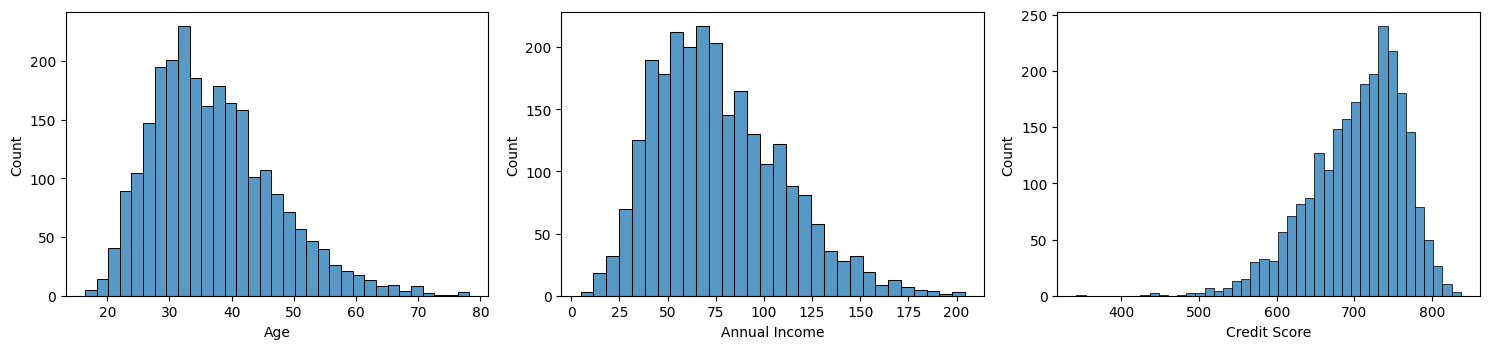

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
num_features = ['Age', 'Annual Income', 'Credit Score']

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

- **Age** and **Annual Income** exhibit a right-skewed distribution.
- **Credit Score** exhibits a left-skewed distribution.

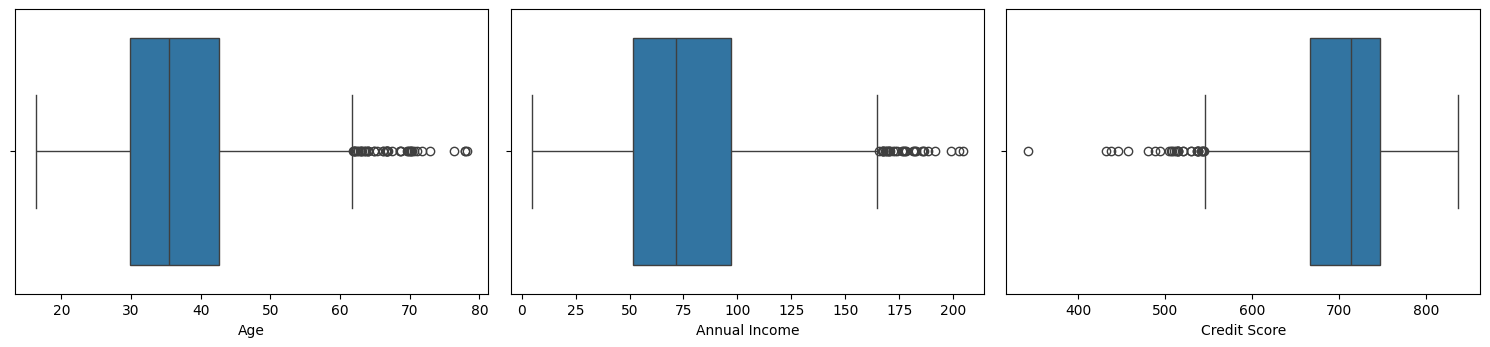

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();    # to add spacing between plots

* There are outliers in all the numerical attributes in the data.

Approval
Yes    56.04
No     43.96
Name: proportion, dtype: float64 



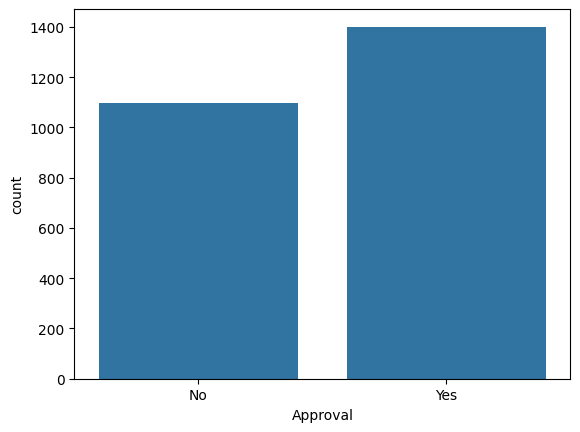

In [ ]:
# checking the distribution of the categories in Approval
print(100*data['Approval'].value_counts(normalize=True), '\n')

# plotting the count plot for Approval
sns.countplot(data=data, x='Approval');

- ~60% of the credit card applications in the data have been approved.

PriorDefault
0    70.0
1    30.0
Name: proportion, dtype: float64 



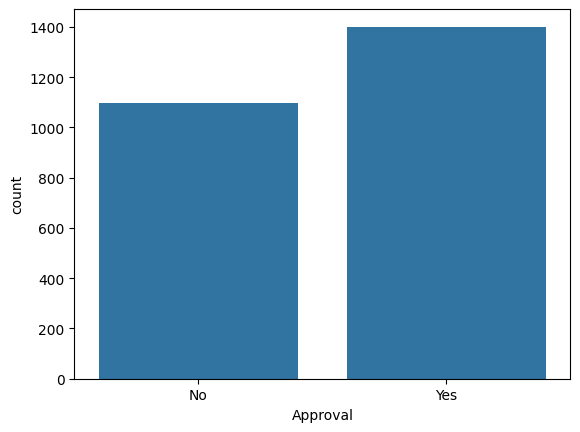

In [ ]:
# checking the distribution of the categories in PriorDefault
print(100*data['PriorDefault'].value_counts(normalize=True), '\n')

# plotting the count plot for PriorDefault
sns.countplot(data=data, x='Approval');

- 70% of the applicants have no prior defaults.









Employed
1    70.2
0    29.8
Name: proportion, dtype: float64 



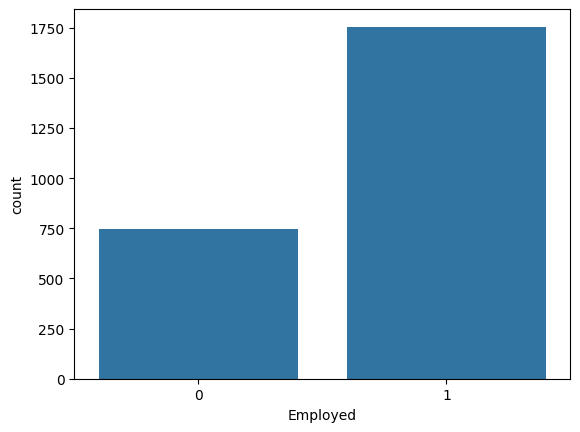

In [ ]:
# checking the distribution of the categories in Employed
print(100*data['Employed'].value_counts(normalize=True), '\n')

# plotting the count plot for Employed
sns.countplot(data=data, x='Employed');

- ~70% of applicants are currently employed.

Gender
Female    50.04
Male      47.84
Others     2.12
Name: proportion, dtype: float64 



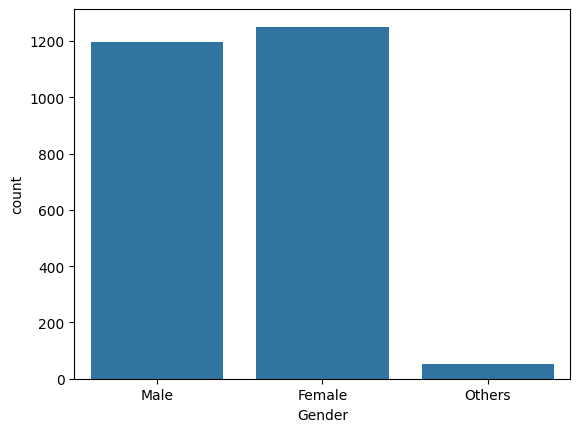

In [ ]:
# checking the distribution of the categories in Gender
print(100*data['Gender'].value_counts(normalize=True), '\n')

# plotting the count plot for Gender
sns.countplot(data=data, x='Gender');

- Almost half the applicants are women.

### Bivariate Analysis

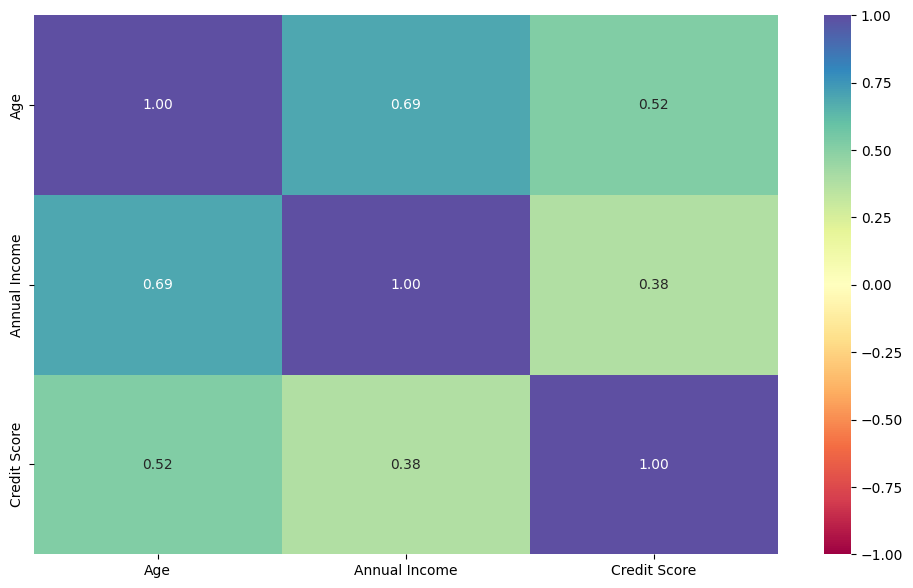

In [ ]:
# defining the size of the plot
plt.figure(figsize=(12, 7))

# plotting the heatmap for correlation
sns.heatmap(
    data[num_features].corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

- As the age of the applicants increases, their annual incomes increase.
- The correlation between annual income and credit score is positive but not as strong as that between annual income and age.

<Figure size 1200x800 with 0 Axes>

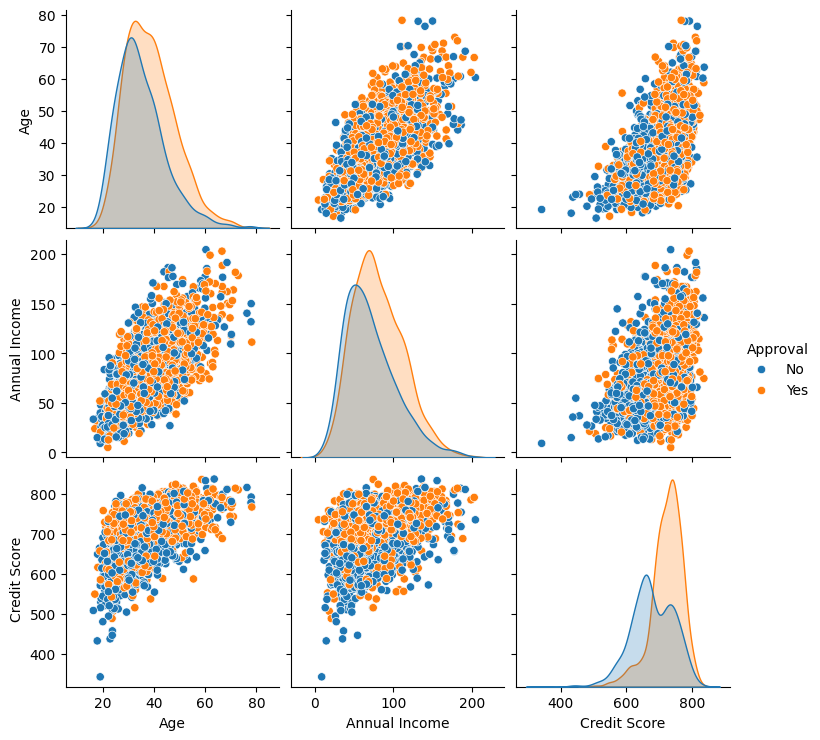

In [ ]:
# Scatter plot matrix
plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=num_features, hue='Approval', diag_kind='kde');

- Applicants with a credit score of more than 640 are more likely to have their application approved.

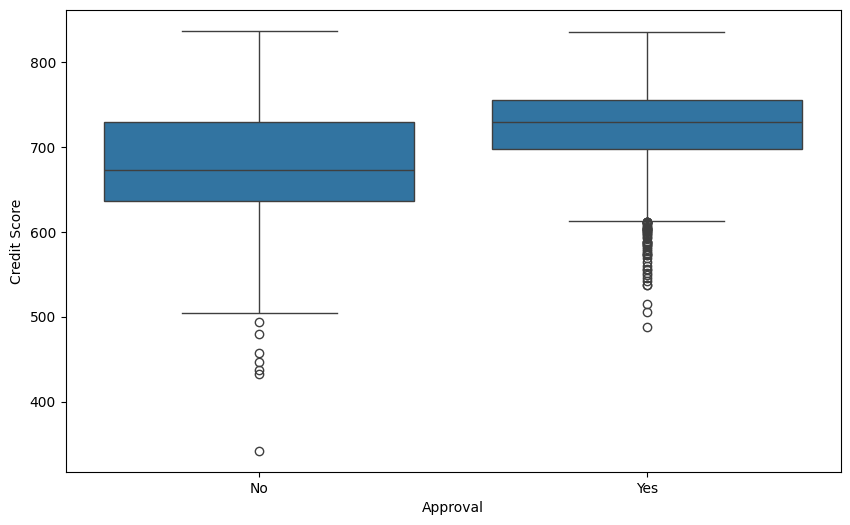

In [ ]:
# Credit Score vs Approved (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Approval', y='Credit Score');

- In general, applicants with higher credit scores have higher chances of getting credit card approval.
    - For a credit score of more than 600, you are likely to get a credit card.
- The range of credit scores of applicants whose applications were rejected is wider.

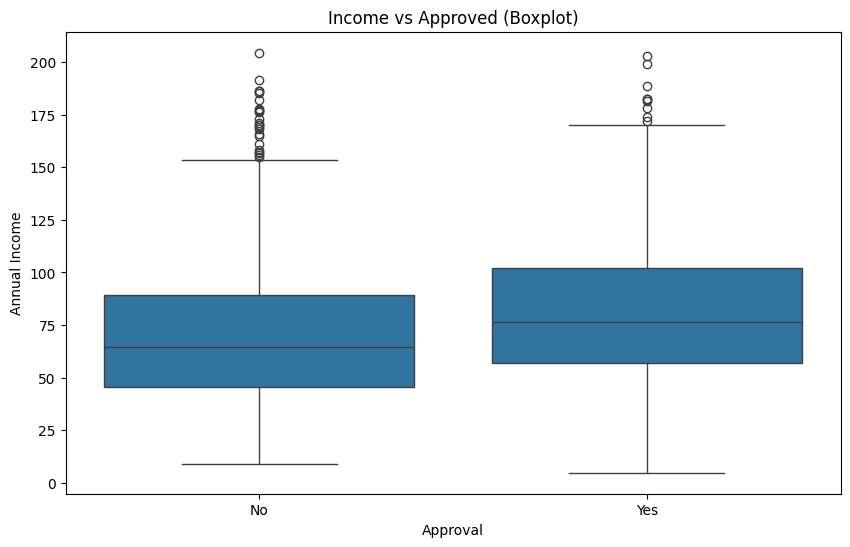

In [ ]:
# Income vs Approved (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Approval', y='Annual Income')
plt.title('Income vs Approved (Boxplot)')
plt.show()

- Applicants with high annual incomes have slightly higher chances of getting credit cards approved.

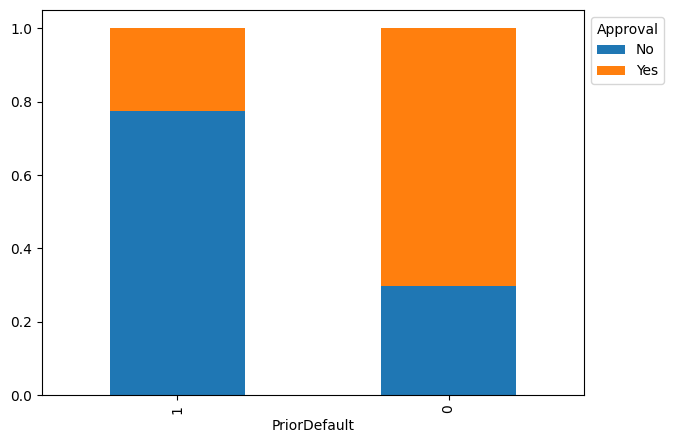

In [ ]:
# creating a crosstab for Approval vs PriorDefault
tab = pd.crosstab(
    data['PriorDefault'],
    data['Approval'],
    normalize='index'    # normalizing by dividing each row by its row total
).sort_values(by='No', ascending=False)    # sorting the resulting crosstab


# Plot the stacked bar chart
tab.plot(kind='bar', stacked=True, figsize=(7, 5))    # creating a stacked bar chart from the normalized crosstab
plt.xlabel('PriorDefault')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Approval');    # adding a legend for the 'Approval' column

- Applicants with a prior default history have a higher chance of having their application rejected.

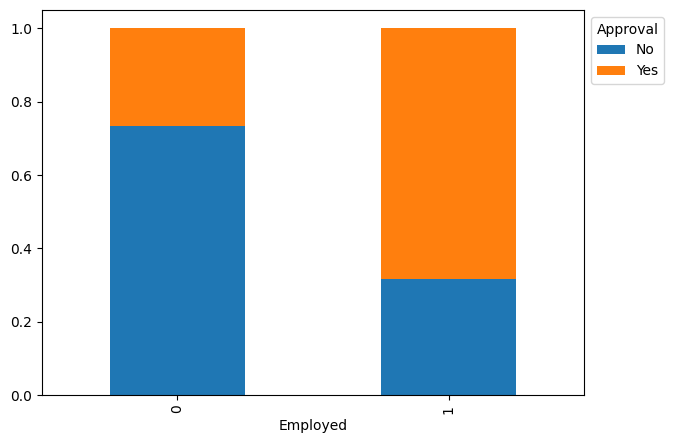

In [ ]:
# creating a crosstab for Approval vs Employed
tab = pd.crosstab(
    data['Employed'],
    data['Approval'],
    normalize='index'    # normalizing by dividing each row by its row total
).sort_values(by='No', ascending=False)    # sorting the resulting crosstab


# Plot the stacked bar chart
tab.plot(kind='bar', stacked=True, figsize=(7, 5))    # creating a stacked bar chart from the normalized crosstab
plt.xlabel('Employed')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Approval');    # adding a legend for the 'Approval' column

- ~70% of applicants who are currently not employed have their credit card applications rejected, while ~70% of applicants who are currently employed have their credit card applications approved.

# **Data Preparation for Modeling**

*   List item
*   List item



In [ ]:
# defining the explanatory (independent) and response (dependent) variables
X = data.drop(["Approval"], axis=1)
y = data["Approval"]

In [ ]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.head()

,Age,Credit Score,Annual Income,PriorDefault,Employed,Gender_Male,Gender_Others
0,33.541537,678.0,53.984881,0.0,1.0,1.0,0.0
1,24.808335,624.0,41.131160,1.0,0.0,1.0,0.0
2,23.342078,671.0,33.012298,1.0,1.0,0.0,0.0
3,29.987970,671.0,66.942232,1.0,1.0,0.0,0.0
4,29.707443,630.0,116.613468,1.0,1.0,1.0,0.0


In [ ]:
# label encoding the response variable
y = y.map({'Yes': 1, 'No': 0})

y.head()

,Approval
0,0
1,0
2,0
3,0
4,0


In [ ]:
# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)    # stratify ensures that the training and test sets have a similar distribution of the response variable

In [ ]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (2000, 7)
Shape of test set: (500, 7) 

Percentage of classes in training set:
Approval
1    56.05
0    43.95
Name: proportion, dtype: float64 

Percentage of classes in test set:
Approval
1    56.0
0    44.0
Name: proportion, dtype: float64


# **Model Building**

### Decision Tree (sklearn default)


In [ ]:
# creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Model Evaluation

We define a utility function to collate all the metrics into a single data frame, and another to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

**Note**: We want to maximize the F1 Score to ensure that we reduce both the chances of approving non-credible applications as well as rejecting credible ones.

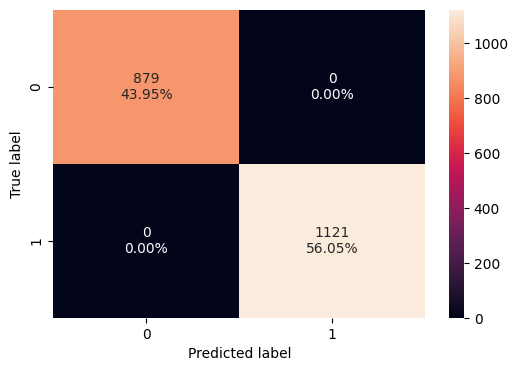

In [ ]:
plot_confusion_matrix(dtree1, X_train, y_train)

In [ ]:
dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


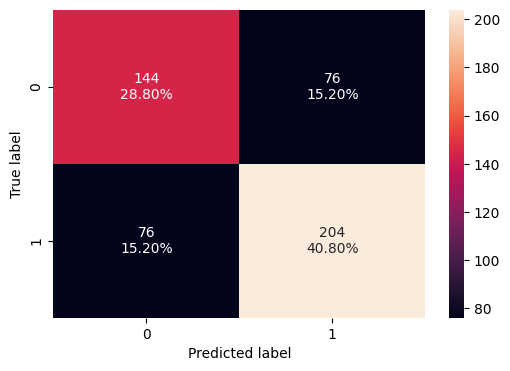

In [ ]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [ ]:
dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.696,0.728571,0.728571,0.728571


- There is a huge difference between the training and test F1 Scores.
- This indicates that the model is overfitting.

#### Visualizing the Decision Tree

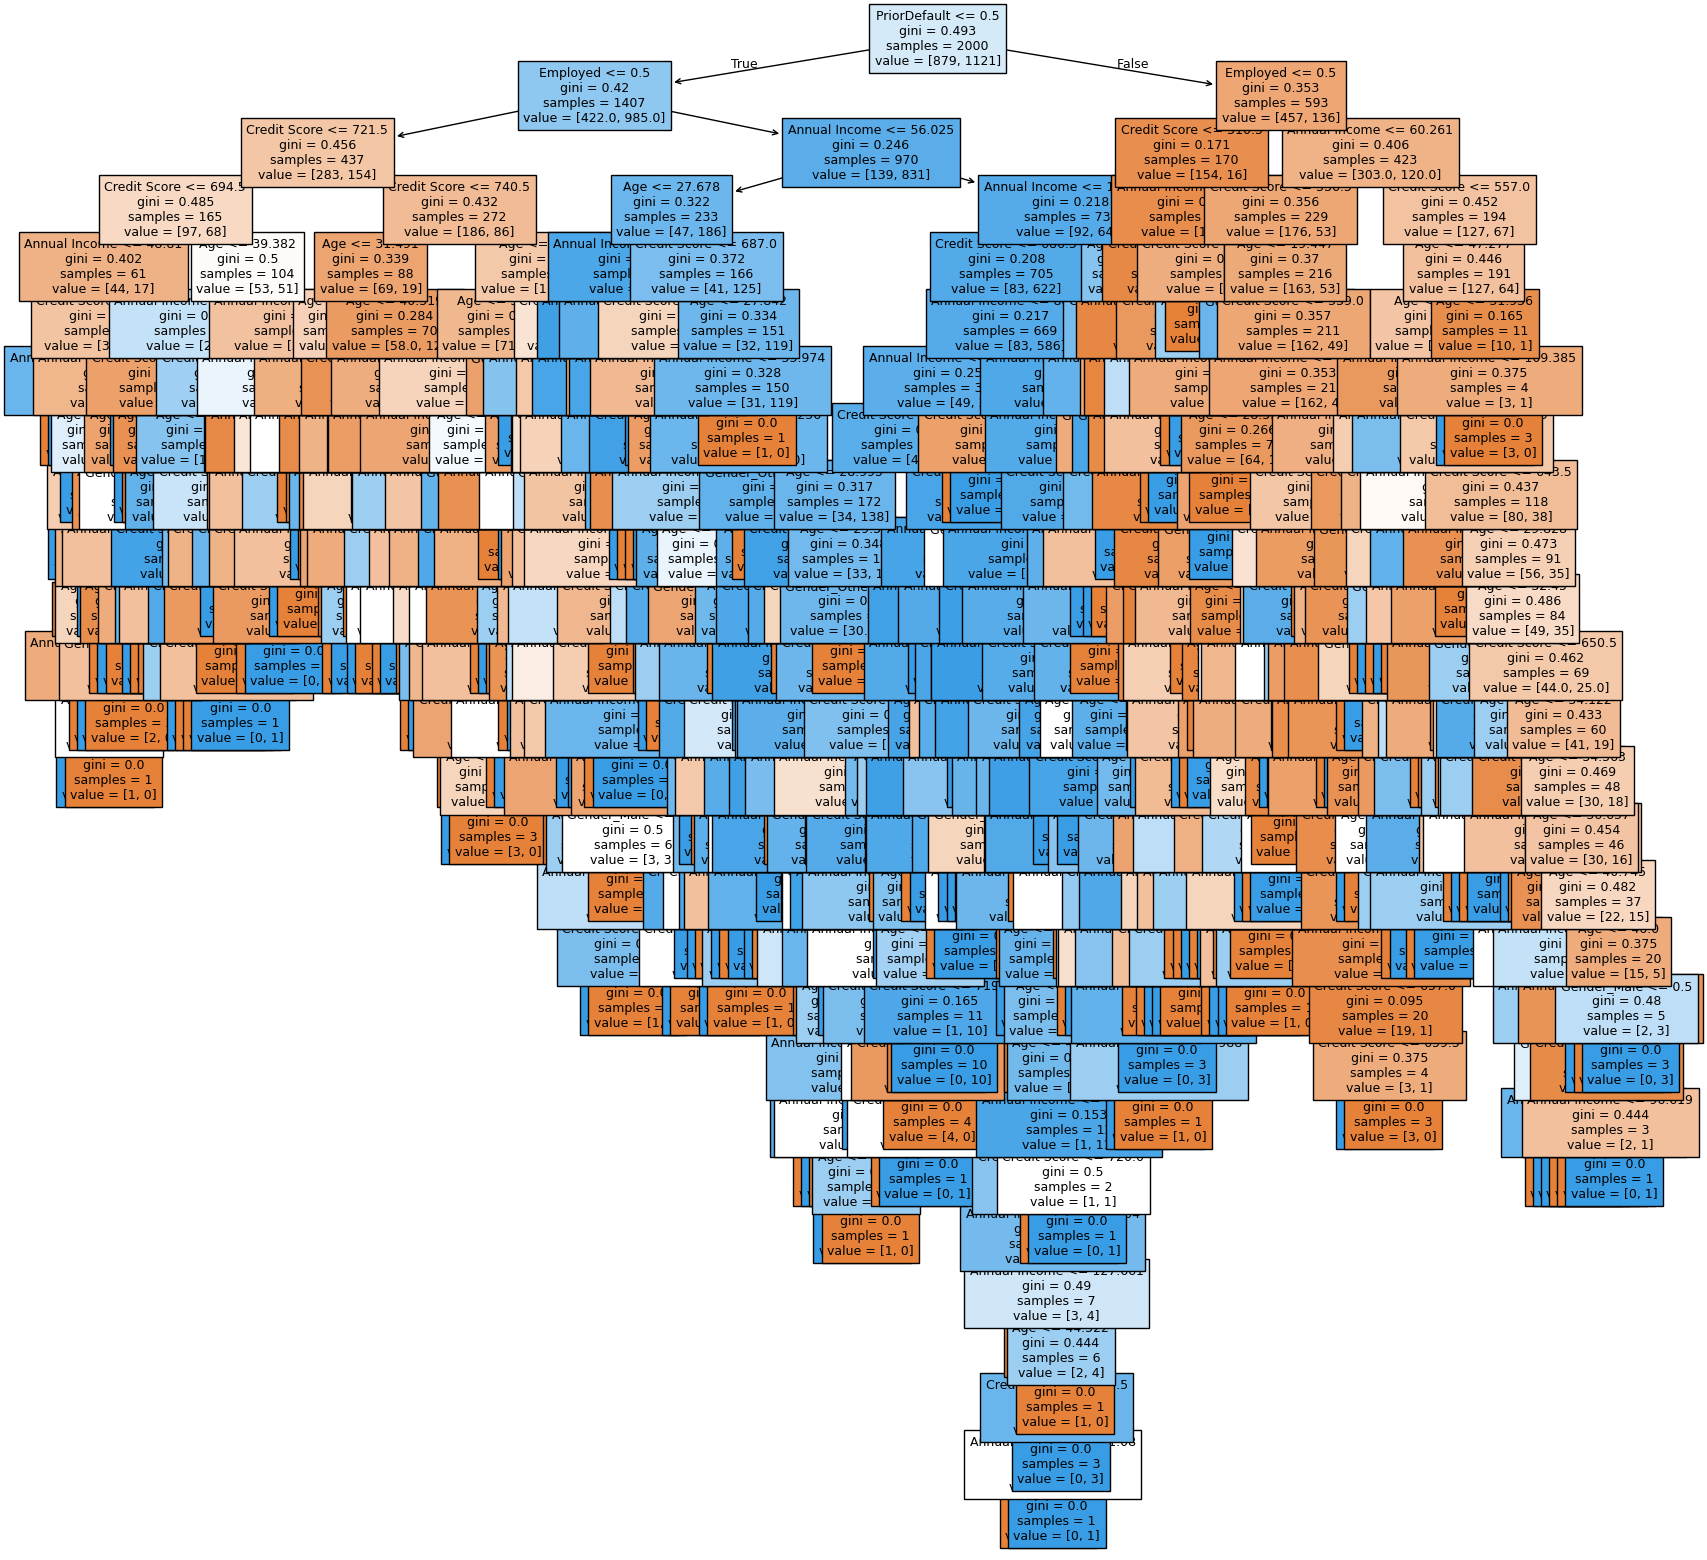

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

- We can observe that this is a very complex tree.

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- PriorDefault <= 0.50
|   |--- Employed <= 0.50
|   |   |--- Credit Score <= 721.50
|   |   |   |--- Credit Score <= 694.50
|   |   |   |   |--- Annual Income <= 48.81
|   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |--- Annual Income >  48.81
|   |   |   |   |   |--- Credit Score <= 679.50
|   |   |   |   |   |   |--- Annual Income <= 66.92
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- Annual Income >  66.92
|   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |--- Credit Score >  679.50
|   |   |   |   |   |   |--- Annual Income <= 70.75
|   |   |   |   |   |   |   |--- Age <= 32.40
|   |   |   |   |   |   |   |   |--- Age <= 24.70
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |--- Age >  24.70
|   |   |   |   |   |   |   |   |   |--- Age <= 27.56
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0

### Decision Tree (Pre-pruning)

In [ ]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [ ]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(6), max_leaf_nodes=np.int64(20),
                       min_samples_split=np.int64(50), random_state=42)

#### Model Evaluation

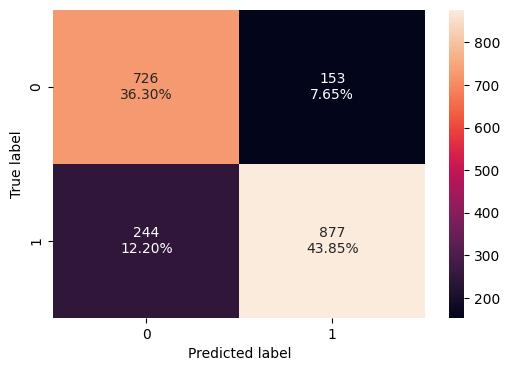

In [ ]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [ ]:
dtree2_train_perf = model_performance_classification(
    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.8015,0.782337,0.851456,0.815435


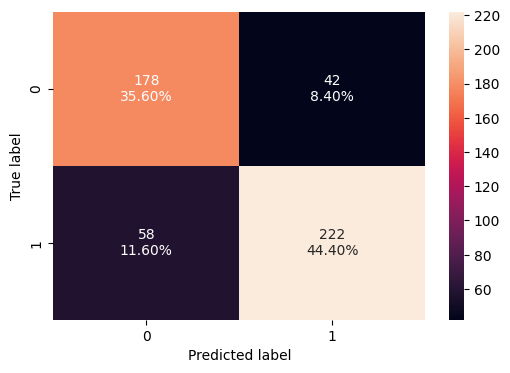

In [ ]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [ ]:
dtree2_test_perf = model_performance_classification(
    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.8,0.792857,0.840909,0.816176


- The training and test scores are very close to each other, indicating a generalized performance.

#### Visualizing the Decision Tree

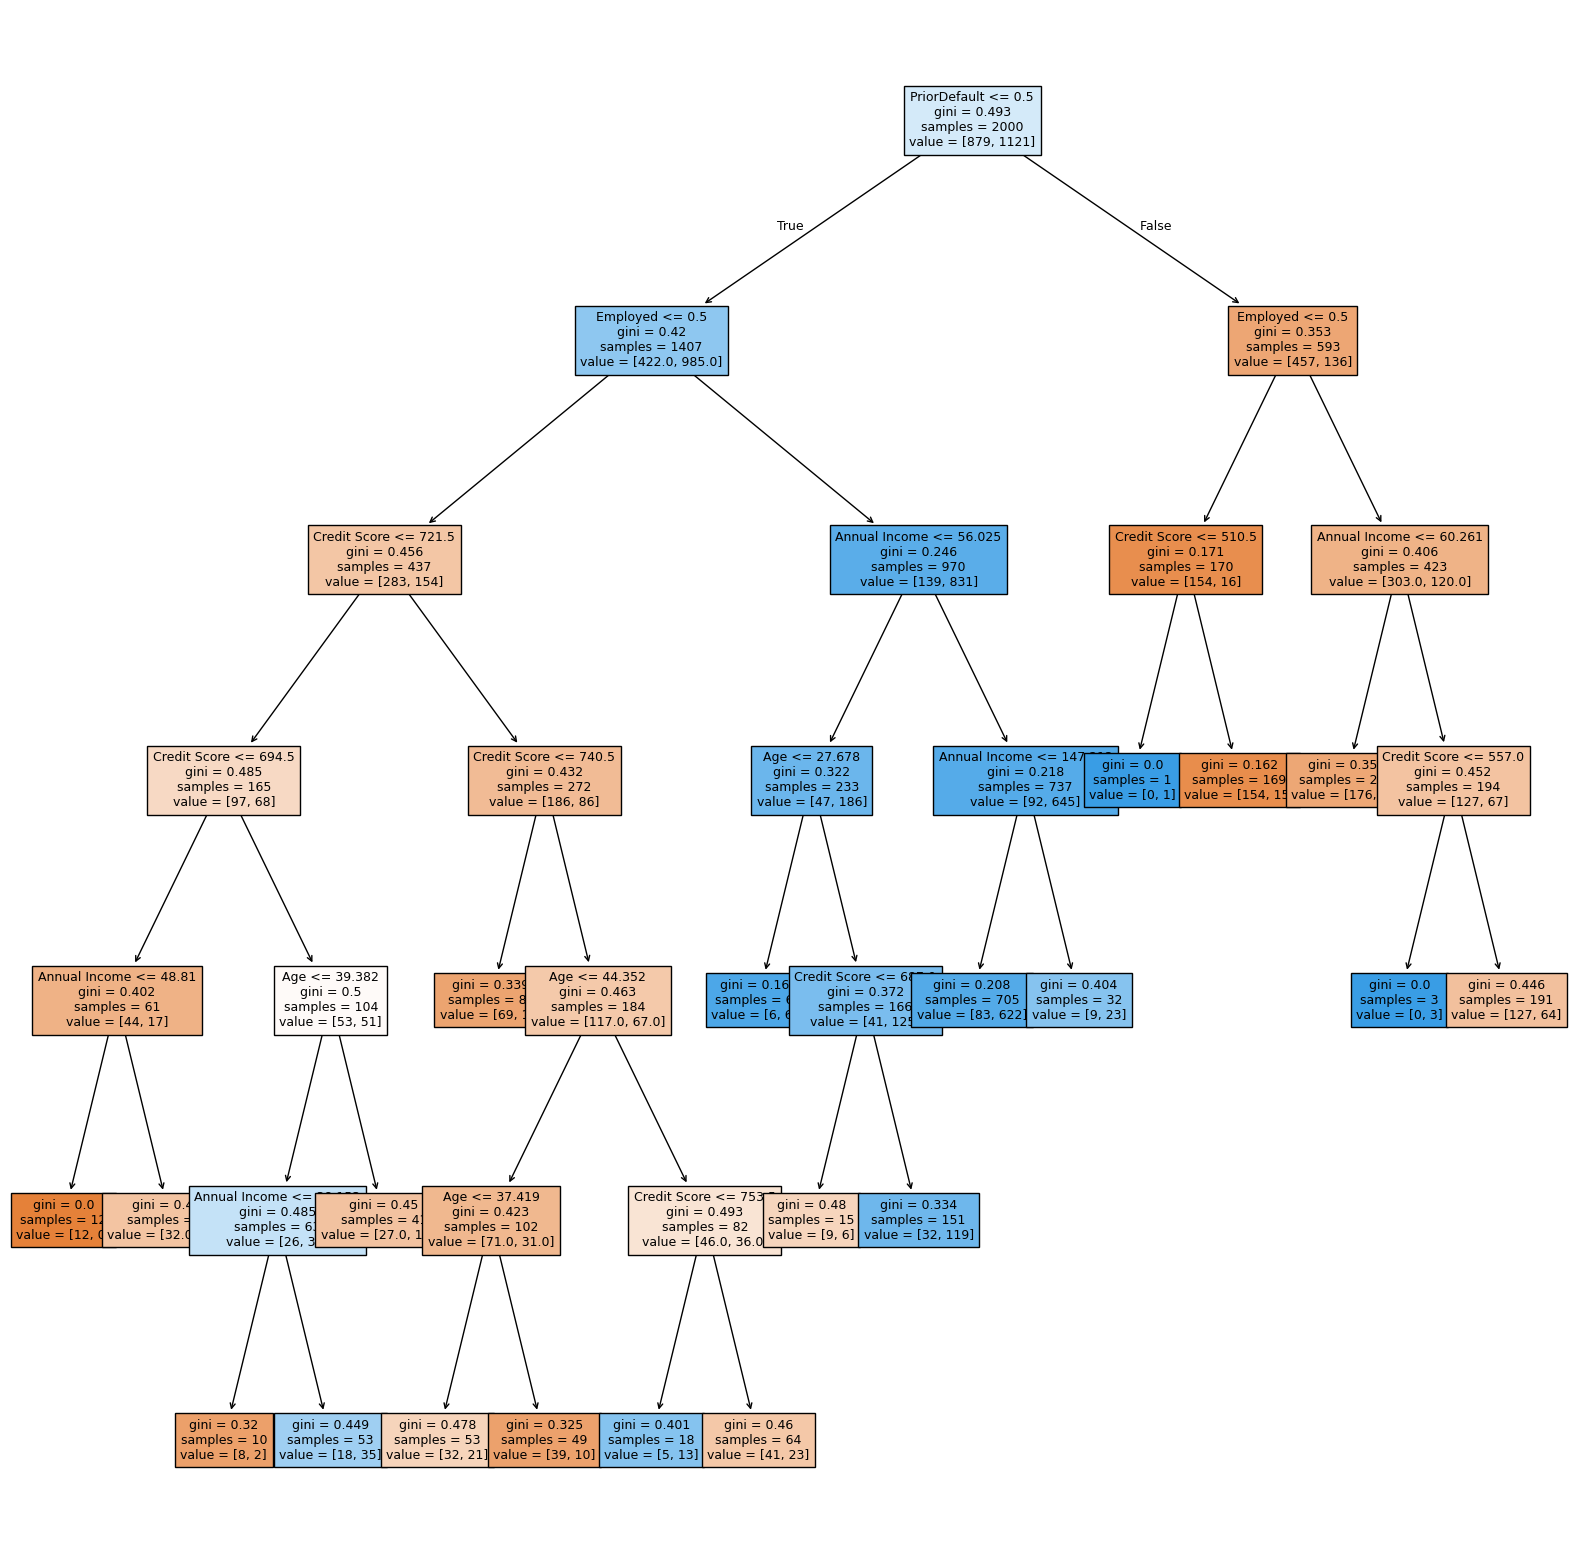

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

- This is a far less complex tree than the previous one.
- We can observe the decision rules much more clearly in the plot.

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree2,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- PriorDefault <= 0.50
|   |--- Employed <= 0.50
|   |   |--- Credit Score <= 721.50
|   |   |   |--- Credit Score <= 694.50
|   |   |   |   |--- Annual Income <= 48.81
|   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |--- Annual Income >  48.81
|   |   |   |   |   |--- weights: [32.00, 17.00] class: 0
|   |   |   |--- Credit Score >  694.50
|   |   |   |   |--- Age <= 39.38
|   |   |   |   |   |--- Annual Income <= 38.15
|   |   |   |   |   |   |--- weights: [8.00, 2.00] class: 0
|   |   |   |   |   |--- Annual Income >  38.15
|   |   |   |   |   |   |--- weights: [18.00, 35.00] class: 1
|   |   |   |   |--- Age >  39.38
|   |   |   |   |   |--- weights: [27.00, 14.00] class: 0
|   |   |--- Credit Score >  721.50
|   |   |   |--- Credit Score <= 740.50
|   |   |   |   |--- weights: [69.00, 19.00] class: 0
|   |   |   |--- Credit Score >  740.50
|   |   |   |   |--- Age <= 44.35
|   |   |   |   |   |--- Age <= 37.42
|   |   |   |   |   |   |--- weights: [32.0

### Decision Tree (Post-pruning)

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000292,0.000875
2,0.000357,0.002304
3,0.000357,0.003732
4,0.000375,0.004482
...,...,...
177,0.001428,0.313310
178,0.001488,0.319263
179,0.004358,0.323621
180,0.076619,0.400239


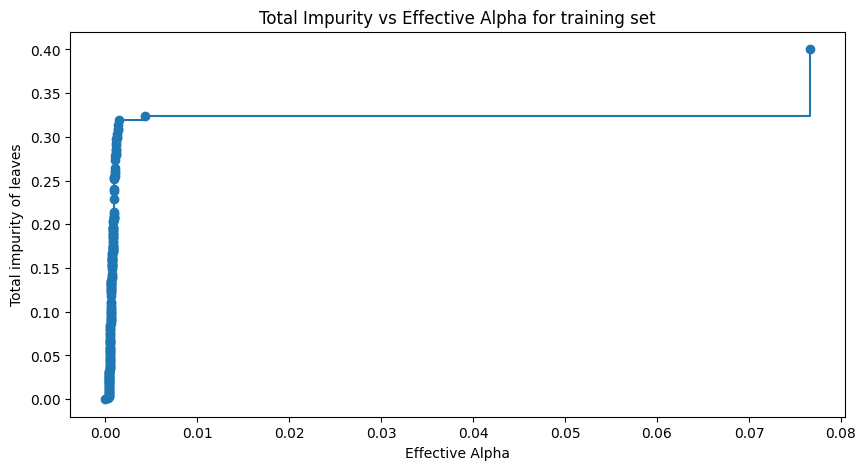

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

- Next, we train a decision tree using the effective alphas.

- The last value in `ccp_alphas` is the alpha value that prunes the whole tree,
leaving the corresponding tree with one node.

In [ ]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.09244006359973189


- Moving ahead, we remove the last element in
``clfs`` and ``ccp_alphas`` as it corresponds to a trivial tree with only one
node.

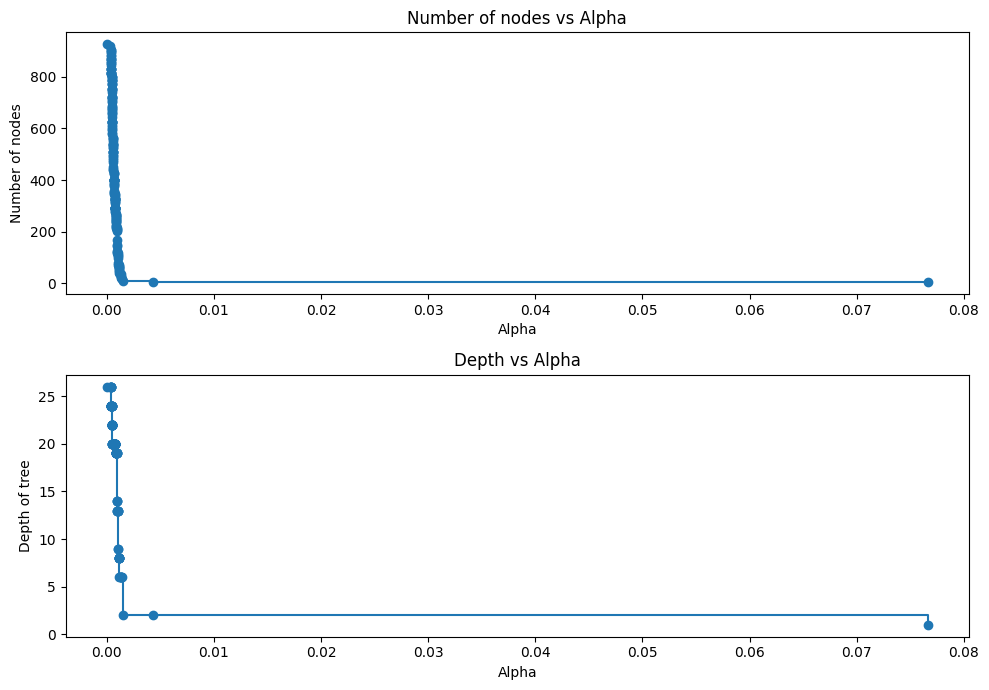

In [ ]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [ ]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [ ]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)


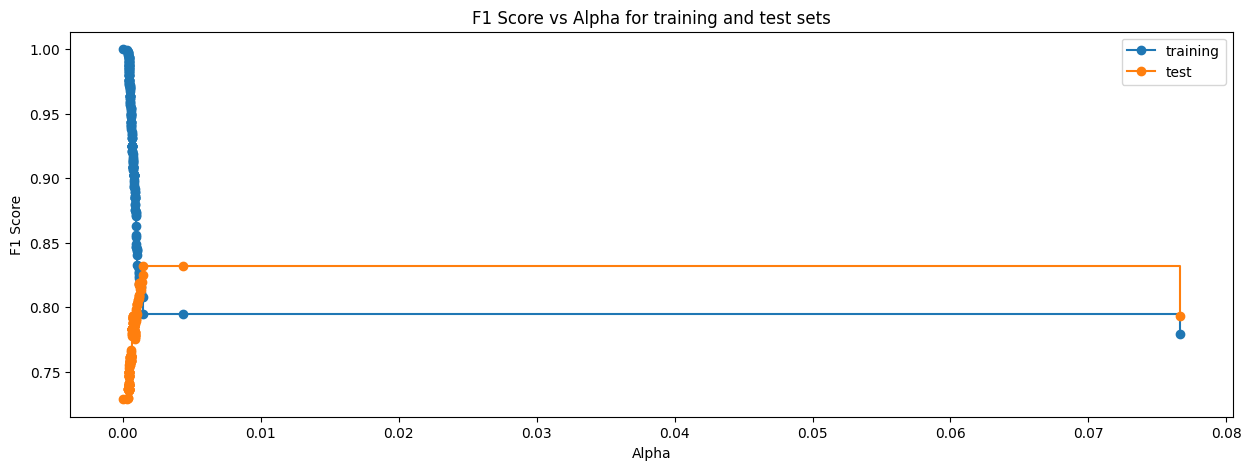

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [ ]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0014881384643434213),
                       random_state=42)


#### Model Evaluation

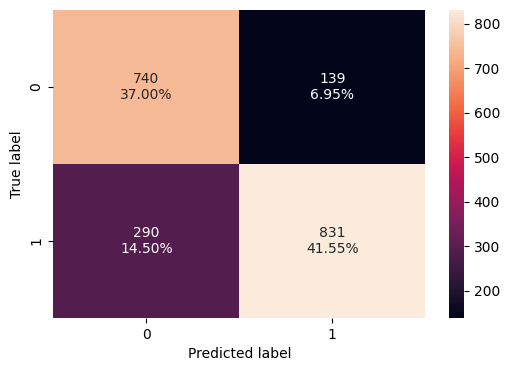

In [ ]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [ ]:
dtree3_train_perf = model_performance_classification(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.7855,0.741302,0.856701,0.794835


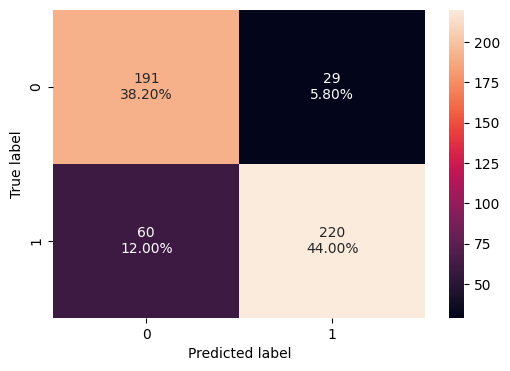

In [ ]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [ ]:
dtree3_test_perf = model_performance_classification(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.822,0.785714,0.883534,0.831758


- The test score is greater than the training score, indicating a generalized performance.

#### Visualizing Decision Tree

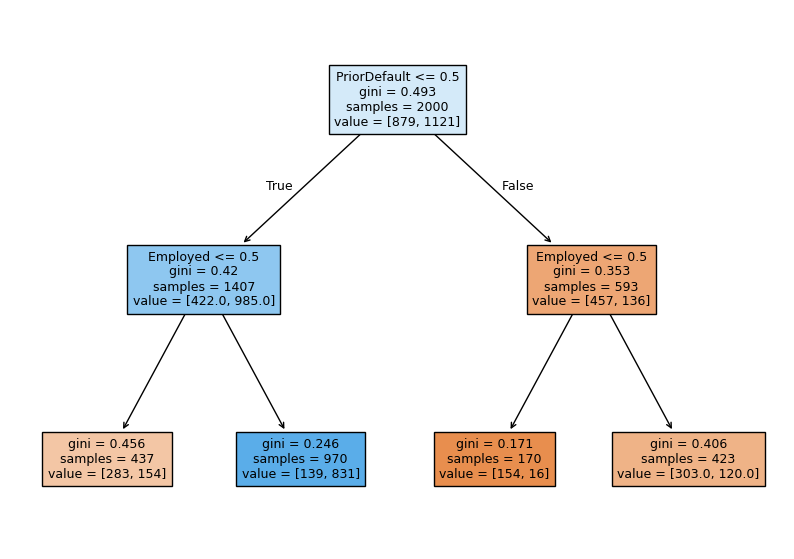

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

- This is a far less complex tree than the previous one.
- The model used only current employment status and prior default history to determine whether the application will be approved or not.

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree3,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- PriorDefault <= 0.50
|   |--- Employed <= 0.50
|   |   |--- weights: [283.00, 154.00] class: 0
|   |--- Employed >  0.50
|   |   |--- weights: [139.00, 831.00] class: 1
|--- PriorDefault >  0.50
|   |--- Employed <= 0.50
|   |   |--- weights: [154.00, 16.00] class: 0
|   |--- Employed >  0.50
|   |   |--- weights: [303.00, 120.00] class: 0



# **Model Performance Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.801500,0.785500
Recall,1.0,0.782337,0.741302
Precision,1.0,0.851456,0.856701
F1,1.0,0.815435,0.794835


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.696000,0.800000,0.822000
Recall,0.728571,0.792857,0.785714
Precision,0.728571,0.840909,0.883534
F1,0.728571,0.816176,0.831758


- Both the pre-pruned and post-pruned decision trees exhibit generalized performances.

- The post-pruned decision tree has an approx. 3.5% better performance on the test set than the training set.
    - This model uses only two features for decision-making.
    - This will result in a low prediction time but it might not be able to perform well on edge cases in unseen data.

- The pre-pruned decision tree has almost the same performance on training and test sets.
    - This model uses a few more features for decision-making than the post-pruned decision tree.
    - This will result in a slightly longer prediction time but it is likely to yield better results on unseen data.

- We'll move ahead with the pre-pruned decision tree as our final model.

### Feature Importance

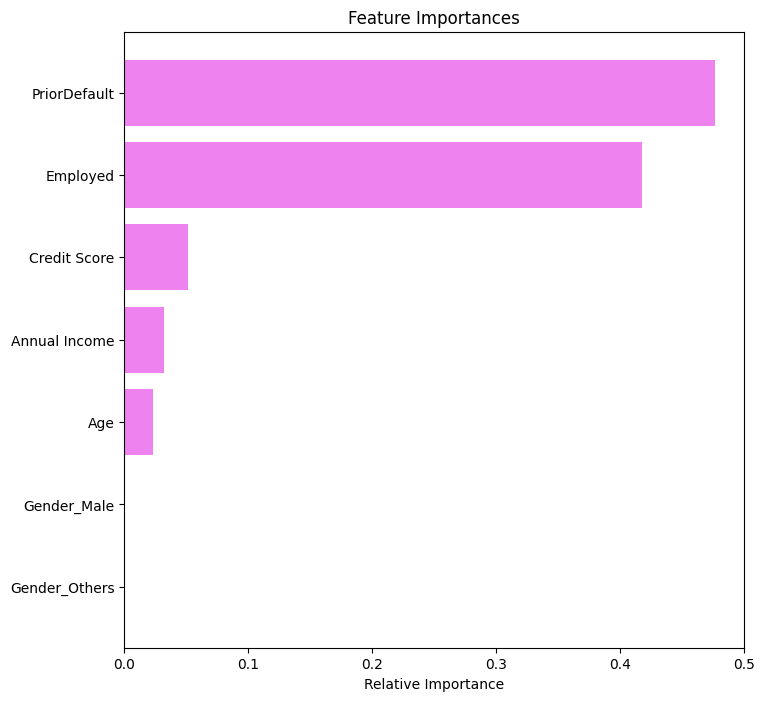

In [ ]:
# importance of features in the tree building
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Current employment status and prior default history are the most influential attributes in determining credit worthiness.
- Credit score and annual income are the next best attributes to consider.

### Predicting on a single data point

In [ ]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:1, :]

# making a prediction
approval_prediction = dtree2.predict(applicant_details)

print(approval_prediction)

[1]
CPU times: user 3.29 ms, sys: 0 ns, total: 3.29 ms
Wall time: 3.23 ms


- The model was able to predict in under half a second.
- Instead of predicting a class (approve/reject), the model can also predict the likelihood of approval.

In [ ]:
# making a prediction
approval_likelihood = dtree2.predict_proba(applicant_details)

print(approval_likelihood[0, 1])

0.9104477611940298


- This indicates that the model is ~91% confident that the applicant is creditworthy and the application should be approved.

# **Business Recommendations**

-  The bank can deploy this model for the initial screening of credit card applications.

- Instead of outputting an approve or reject, the model can be made to output the likelihood of approval.

- In case the likelihood of approval is below a certain threshold, say 60%, then the application can be sent for manual inspection.

- This would reduce the overall TAT for the initial screening.

<font size=6 color='blue'>Power Ahead</font>
___